In [1]:
import pandas as pd
train_data = pd.read_csv('weatherAUS.csv')
train_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [2]:
print("Columns : ")
print(train_data.columns)
print()
print("Number of Rows and Columns")
print()
train_data.info()

Columns : 
Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

Number of Rows and Columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  13

In [3]:
train_data['Date'] = pd.to_datetime(train_data['Date'])

In [4]:
pip install seaborn

     |████████████████████████████████| 285 kB 4.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

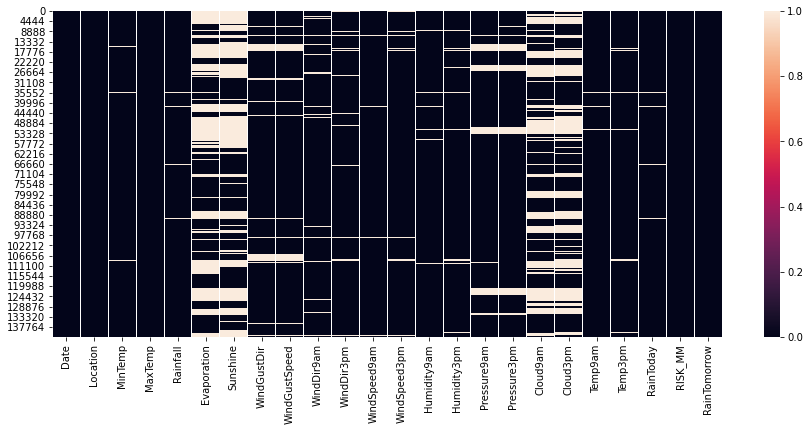

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(15,6))
sns.heatmap(train_data.isnull())

In [9]:
print("The Total Percentage of Null values: ")
(train_data.isnull().sum()/len(train_data))*100

The Total Percentage of Null values: 


Date              0.000000
Location          0.000000
MinTemp           0.447983
MaxTemp           0.226453
Rainfall          0.988797
Evaporation      42.789026
Sunshine         47.692924
WindGustDir       6.561504
WindGustSpeed     6.519308
WindDir9am        7.041838
WindDir3pm        2.656952
WindSpeed9am      0.948007
WindSpeed3pm      1.849599
Humidity9am       1.247600
Humidity3pm       2.538803
Pressure9am       9.855619
Pressure3pm       9.832411
Cloud9am         37.735332
Cloud3pm         40.152469
Temp9am           0.635756
Temp3pm           1.917113
RainToday         0.988797
RISK_MM           0.000000
RainTomorrow      0.000000
dtype: float64

In [11]:
contin = []
category = []
for col in train_data.columns:
    if train_data[col].dtype == 'object':
        category.append(col)
    else:
        contin.append(col)

In [13]:
for item in contin:
    if train_data[item].isnull().any:
        train_data[item] = train_data[item].fillna(train_data[item].mean())
    else:
        pass
        

In [15]:
print("count: ")
train_data['RainToday'].value_counts()

count: 


No     109332
Yes     31455
Name: RainToday, dtype: int64

In [18]:
train_data['RainToday'] = train_data['RainToday'].map({'Yes': 1, 'No':0})

In [19]:
train_data['RainToday'].unique()

array([ 0.,  1., nan])

In [21]:
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes' : 1, 'No': 0})

In [23]:
for col in category:
    train_data[col] = train_data[col].fillna(train_data[col].mode()[0])

In [24]:
train_data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
for col in category:
    train_data[col] = le.fit_transform(train_data[col])

In [28]:
train_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,5.469824,7.624853,13,44.0,13,...,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0,0.0,0
1,2008-12-02,2,7.4,25.1,0.0,5.469824,7.624853,14,44.0,6,...,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0,0.0,0
2,2008-12-03,2,12.9,25.7,0.0,5.469824,7.624853,15,46.0,13,...,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0,0.0,0
3,2008-12-04,2,9.2,28.0,0.0,5.469824,7.624853,4,24.0,9,...,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0,1.0,0
4,2008-12-05,2,17.5,32.3,1.0,5.469824,7.624853,13,41.0,1,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0.2,0


<AxesSubplot:>

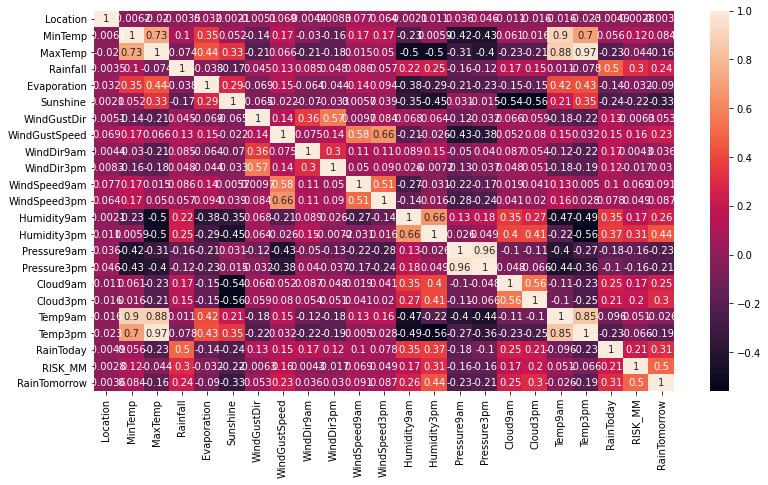

In [29]:
plt.figure(figsize=(13,7))
sns.heatmap(train_data.corr(),annot=True)

<Figure size 792x504 with 0 Axes>

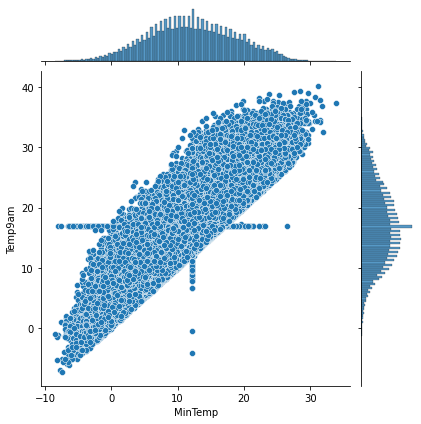

In [31]:
plt.figure(figsize=(11,7))
sns.jointplot(x='MinTemp',y = 'Temp9am', kind= 'scatter', data = train_data)

In [32]:
train_data.drop(['Temp3pm','Temp9am', 'Date', 'Location', 'RISK_MM'],axis=1,inplace=True)

In [33]:
x= train_data.drop('RainTomorrow',axis=1)
y = train_data['RainTomorrow']
print("Done")

Done


In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=400)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=400)

In [36]:
pred = rfc.predict(x_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,pred))

[[31572  1513]
 [ 4665  4908]]


In [39]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     33085
           1       0.76      0.51      0.61      9573

    accuracy                           0.86     42658
   macro avg       0.82      0.73      0.76     42658
weighted avg       0.85      0.86      0.84     42658

